In [25]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
os.environ["PATH"] += os.pathsep + 'C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v9.0/bin'
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [26]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [27]:
from keras.utils import np_utils

In [40]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [39]:
root_dir = "./image/"
categories = ['normal', 'beni', 'negi', 'cheese']
nb_classes = len(categories)
image_size = 50

In [30]:
def draw_model(m):
    SVG(model_to_dot(m, show_shapes=True).create(prog='dot', format='svg'))

In [41]:
def main():
    X_train, X_test, y_train, y_test = np.load("./image/gyudon.npy")
    X_train = X_train.astype("float") / 256
    X_test =X_test.astype("float") / 256
    y_train = np_utils.to_categorical(y_train, nb_classes)
    y_test = np_utils.to_categorical(y_test, nb_classes)
    model = model_train(X_train, y_train)
    model_eval(model, X_test, y_test)
    
    return model

In [42]:
def build_model(in_shape):
    model = Sequential()
    model.add(Convolution2D(32,3,3, border_mode='same', input_shape = in_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Convolution2D(64,3,3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(64,3,3))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [43]:
def model_train(X,y):
    model = build_model(X.shape[1:])
    model.fit(X,y, batch_size = 32, nb_epoch = 30)
    hdf5_file = "./image/gyudon-model.hdf5"
    model.save_weights(hdf5_file)
    return model

In [44]:
def model_eval(model, X, y):
    score = model.evaluate(X, y)
    print('loss=', score[0])
    print('accuracy= ', score[1])

In [45]:
if __name__ == "__main__":
    main_model = main()
    

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(50, 50, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
489/489 [==============================] - 1s 2ms/step - loss: 0.6549 - acc: 0.8349
Epoch 2/30
489/489 [==============================] - 0s 656us/step - loss: 0.3486 - acc: 0.8850
Epoch 3/30
489/489 [==============================] - 0s 627us/step - loss: 0.3568 - acc: 0.8845
Epoch 4/30
489/489 [==============================] - 0s 643us/step - loss: 0.3484 - acc: 0.8824
Epoch 5/30
489/489 [==============================] - 0s 634us/step - loss: 0.3384 - acc: 0.8850
Epoch 6/30
489/489 [==============================] - 0s 703us/step - loss: 0.3390 - acc: 0.8870
Epoch 7/30
489/489 [==============================] - 0s 777us/step - loss: 0.3381 - acc: 0.8870
Epoch 8/30
489/489 [==============================] - 0s 781us/step - loss: 0.3190 - acc: 0.8891
Epoch 9/30
489/489 [==============================] - 0s 662us/step - loss: 0.3087 - acc: 0.8865
Epoch 10/30
489/489 [==============================] - 0s 648us/step - loss: 0.3246 - acc: 0.8860
Epoch 11/30
489/489 [==========

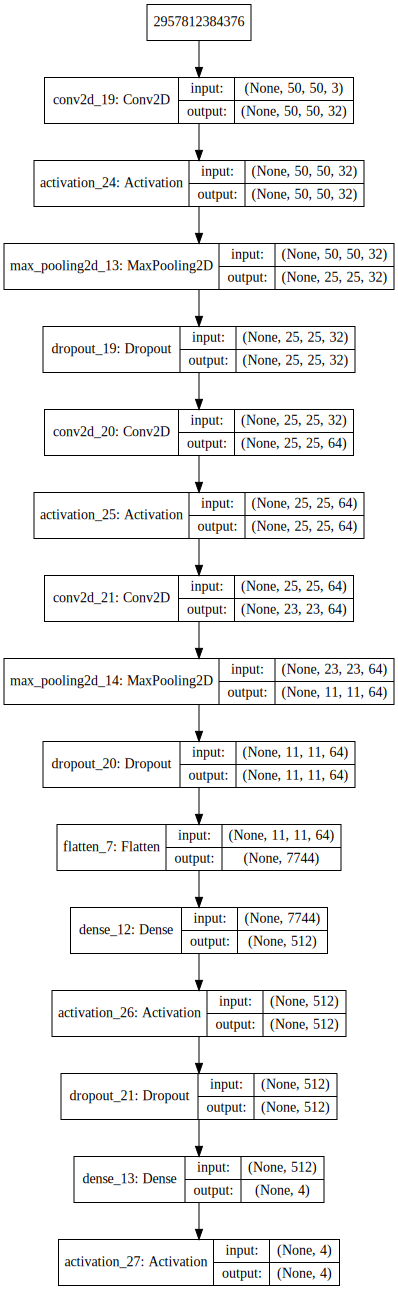

In [46]:
SVG(model_to_dot(main_model, show_shapes=True).create(prog='dot', format='svg'))